In [ ]:
# Installing LangGraph
!pip install -U langgraph
!pip install langchain-ollama
# Installing Ollama
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: langgraph-sdk
    Found existing installation: langgraph-sdk 0.2.15
    Uninstalling langgraph-sdk-0.2.15:
      Successfully uninstalled langgraph-sdk-0.2.15
  Attempting uninstall: langgraph
    Found existing installation: langgraph 1.0.4
    Uninstalling langgraph-1.0.4:
      Successfully uninstalled langgraph-1.0.4
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,204 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:7 http:/

In [ ]:
# Running Ollama server as sub process to be able to hit it with request and pull models
import threading
import subprocess
import time

def start_ollama():
  def run_ollama_serve():
    subprocess.Popen(["ollama", "serve"])

  thread = threading.Thread(target=run_ollama_serve)
  thread.start()
  time.sleep(5)


start_ollama()


In [ ]:
# Getting Gemma 4B
# Getting Gemma embedding
!ollama pull gemma3:4b
!ollama pull embeddinggemma:latest

In [ ]:
!pip install -qU langchain-community beautifulsoup4 chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 13.7 MB/s eta 

## STEP 1
Scrapping the websites with symptoms and description

In [ ]:
LINKS_TO_SCRAPE = [
  "https://my.clevelandclinic.org/health/diseases/22206-insulin-resistance",
  "https://www.webmd.com/diabetes/insulin-resistance-syndrome",
  "https://www.healthline.com/health/diabetes/insulin-resistance-symptoms",
  "https://www.mayoclinic.org/diseases-conditions/obesity/multimedia/vid-20536756",
  "https://www.health.com/insulin-resistance-symptoms-8410271",
  "https://berkeleymedical.com.au/2025/05/what-is-insulin-resistance-causes-symptoms/",
  "https://www.jci.org/articles/view/142245",
  "https://www.diabetes.org.uk/about-diabetes/looking-after-diabetes/treatments/insulin/resistance",
  "https://www.pharmachoice.com/signs-of-insulin-resistance/",
  "https://www.nature.com/articles/s41392-022-01073-0",
  "https://www.synergypdx.com/blog/9-signs-of-insulin-resistance",
  "https://www.anadolumedicalcenter.com/health-guide/insulin-resistance-what-it-is-symptoms-diagnosis-treatment",
  "https://emedicine.medscape.com/article/122501-overview",
  "https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/prediabetes-insulin-resistance",
  "https://www.medicalnewstoday.com/articles/305567",
  "https://www.sciencedirect.com/science/article/abs/pii/S0208521623000761",
  "https://www.drtsoukalas.com/8_common_health_problems_due_to_insulin_resistance-lp-25.html",
  "https://www.diabinfo.de/en/prevention/diabetes/fact-check/what-is-insulin-resistance.html",
  "https://www.frontiersin.org/journals/endocrinology/articles/10.3389/fendo.2023.1149239/full",
  "https://www.mayoclinic.org/diseases-conditions/prediabetes/symptoms-causes/syc-20355278"
]

In [ ]:
import requests
from bs4 import BeautifulSoup
from typing import List, Dict, Any
from pydantic import BaseModel, Field
from langchain_ollama.chat_models import ChatOllama
import re

# ========== CONFIG ==========
from langchain_community.document_loaders import WebBaseLoader



llm = ChatOllama(model="gemma3:4b", temperature=0.1)

# ========= DATA MODELS =========

class SymptomStruct(BaseModel):
    symptom_name: str
    clean_description: str
    severity: str = Field(default="unknown")
    associated_conditions: List[str] = []
    snomed_id: str = Field(default="")

# ========= STEP 1: Scrape the Website =========

def scrape_website(url: str) -> str:
    """
    Fetch website content and extract main text.
    """
    resp = requests.get(url, timeout=10)
    resp.raise_for_status()

    loader = WebBaseLoader(url)
    docs = loader.load()
    return docs[0].page_content

# ========= STEP 2: Segment Text =========

def smart_segment(raw_text: str, target_tokens: int = 500) -> List[str]:
    """
    Combines multiple strategies for optimal chunking.
    1. Try section-based splitting first
    2. Fall back to sentence-based for large sections
    3. Ensure no chunk exceeds token limit
    """
    def estimate_tokens(text: str) -> int:
        return len(text) // 4

    # First pass: split by sections
    section_pattern = r'\n(?=[A-Z][^.!?]*:|\#{1,6}\s)'
    sections = re.split(section_pattern, raw_text)

    final_segments = []

    for section in sections:
        section = section.strip()
        if not section or len(section) < 50:
            continue

        # If section is small enough, keep as-is
        if estimate_tokens(section) <= target_tokens:
            final_segments.append(section)
        else:
            # Split large sections by sentences
            sentence_endings = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s'
            sentences = re.split(sentence_endings, section)

            current_chunk = []
            current_tokens = 0

            for sentence in sentences:
                sent_tokens = estimate_tokens(sentence)

                if current_tokens + sent_tokens > target_tokens and current_chunk:
                    final_segments.append(' '.join(current_chunk))
                    current_chunk = [sentence]
                    current_tokens = sent_tokens
                else:
                    current_chunk.append(sentence)
                    current_tokens += sent_tokens

            if current_chunk:
                final_segments.append(' '.join(current_chunk))

    return final_segments

# ========= STEP 3: Structuring LLM =========

def structure_symptoms_llm(segment: str) -> List[SymptomStruct]:
    """
    Use an LLM to convert raw text segment into structured symptom JSON.
    """
    prompt = f"""You are a medical information extraction specialist. Your task is to extract symptom information optimized for semantic search in a vector database.

CRITICAL RULES:
1. Extract ONLY symptoms (observable/reportable signs) - NOT diagnoses or conditions
2. Separate symptoms from related conditions clearly
3. If a term is both a condition AND can present symptoms, extract the symptomatic presentation
4. Provide rich, semantically diverse descriptions for better vector embeddings

INPUT TEXT:
\"\"\"{segment}\"\"\"

OUTPUT FORMAT (JSON array):
{{
  "entry_type": "symptom",  // Always "symptom" for this extraction
  "symptom_name": "Clinical or common name",
  "clean_description": "Detailed description with synonyms and context. Include what patients might say and clinical terms.",
  "casual_terms": ["how patients describe it", "alternative phrasings"],
  "severity": "mild|moderate|severe|unknown",
  "associated_conditions": ["Related diagnoses or conditions"],
  "snomed_id": "",  // Leave empty unless explicitly stated
  "context_notes": "Additional clinical context, risk factors, or when this symptom typically appears"
}}

EXTRACTION GUIDELINES:

**What TO Extract:**
- Observable signs (skin changes, physical symptoms)
- Reportable symptoms (pain, fatigue, thirst)
- Measurable indicators (high blood glucose, elevated cholesterol)
- Physical manifestations of conditions

**What NOT to Extract:**
- Disease names as standalone entries (e.g., "Type 2 Diabetes" - extract its symptoms instead)
- Procedures or tests
- Medications or treatments
- Generic health advice

**Description Quality:**
- Include both clinical and lay terminology
- Add anatomical locations when relevant
- Mention typical patient presentations
- Include severity indicators from text
- Add contextual information (e.g., "worse in the morning", "progressive over time")

**Examples:**

GOOD:
{{
  "entry_type": "symptom",
  "symptom_name": "Acanthosis nigricans",
  "clean_description": "Dark, thick, velvety patches of skin, typically appearing in body folds such as the armpits, neck, and groin. Often described as dirty-looking skin that doesn't wash off.",
  "casual_terms": ["dark skin patches", "thick discolored skin", "velvety dark skin in armpits"],
  "severity": "mild",
  "associated_conditions": ["Insulin Resistance", "Type 2 Diabetes", "PCOS"],
  "context_notes": "Common early sign of insulin resistance, particularly in skin folds"
}}

BAD:
{{
  "entry_type": "symptom",
  "symptom_name": "Type 2 Diabetes",
  "clean_description": "Type 2 Diabetes",
  "casual_terms": [],
  "severity": "severe",
  "associated_conditions": ["Insulin Resistance"]
}}

Return ONLY the JSON array. No preamble, no markdown formatting, no explanations."""

    llm_response = llm.invoke(prompt)
    llmr = llm_response.content.replace("```json", "").replace("```", "")
    print(llmr)
    return llmr

# ========= STEP 4: Pipeline Runner =========

def run_pipeline(url: str) -> List[Dict[str, Any]]:
    """
    Full pipeline: scrape → segment → structure
    """
    print(f"[INFO] Scraping website: {url}")
    raw_text = scrape_website(url)

    print(f"[INFO] Extracted {len(raw_text.split())} words")

    segments = segment_text(raw_text)
    print(f"[INFO] Divided into {len(segments)} segments")

    structured_symptoms = []
    for i, seg in enumerate(segments):
        print(f"[INFO] Structuring segment {i+1}/{len(segments)}")
        try:
            symptoms = structure_symptoms_llm(seg)
            structured_symptoms.extend(eval(symptoms))
        except Exception as e:
            print(f"[WARN] Failed to structure segment {i+1}: {e}")


    # Convert to dictionaries for later storage
    return structured_symptoms

# ========= EXAMPLE USAGE =========

symptoms_json = run_pipeline(LINKS_TO_SCRAPE[0])

res = [dict(s) for s in symptoms_json]

print("[INFO] Structured Symptoms Output:")
for s in res:
    print(s)


[INFO] Scraping website: https://my.clevelandclinic.org/health/diseases/22206-insulin-resistance
[INFO] Extracted 2212 words
[INFO] Divided into 5 segments
[INFO] Structuring segment 1/5

[
  {
    "entry_type": "symptom",
    "symptom_name": "Skin tags",
    "clean_description": "Small, benign growths of skin, often appearing in areas with skin folds and increased skin friction. Patients may describe them as small, hanging pieces of skin. They are frequently associated with insulin resistance and hyperinsulinemia.",
    "casual_terms": ["hanging skin tags", "small growths of skin"],
    "severity": "mild",
    "associated_conditions": ["Insulin Resistance"],
    "context_notes": "Common early sign of insulin resistance, particularly in skin folds"
  },
  {
    "entry_type": "symptom",
    "symptom_name": "Discolored patches of skin",
    "clean_description": "Areas of skin with altered pigmentation, often appearing as dark or light patches. Patients may describe these as 'dirty-lookin

In [ ]:

results = []


for link in  LINKS_TO_SCRAPE:
  print(str(LINKS_TO_SCRAPE.index(link)) + ":")
  print(link)
  symptoms_json = run_pipeline(LINKS_TO_SCRAPE[7])

  res = [dict(s) for s in symptoms_json]
  results.extend(res)


0:
https://my.clevelandclinic.org/health/diseases/22206-insulin-resistance
[INFO] Scraping website: https://www.diabetes.org.uk/about-diabetes/looking-after-diabetes/treatments/insulin/resistance
[INFO] Extracted 1177 words
[INFO] Divided into 3 segments
[INFO] Structuring segment 1/3

[
  {
    "entry_type": "symptom",
    "symptom_name": "Elevated blood glucose",
    "clean_description": "Increased levels of glucose in the bloodstream, a hallmark of insulin resistance and subsequent conditions like diabetes. Patients may describe it as 'high blood sugar' or 'feeling constantly thirsty'.",
    "casual_terms": ["high blood sugar", "sweet urine", "feeling thirsty"],
    "severity": "mild|moderate|severe",
    "associated_conditions": ["Insulin Resistance", "Type 2 Diabetes", "Prediabetes", "Gestational Diabetes"],
    "context_notes": "Often measured through blood tests; severity correlates with the degree of insulin resistance."
  },
  {
    "entry_type": "symptom",
    "symptom_name":

In [ ]:
results[:5]

[{'entry_type': 'symptom',
  'symptom_name': 'Elevated blood glucose',
  'clean_description': "Increased levels of glucose in the bloodstream, a hallmark of insulin resistance and subsequent conditions like diabetes. Patients may describe it as 'high blood sugar' or 'feeling constantly thirsty'.",
  'casual_terms': ['high blood sugar', 'sweet urine', 'feeling thirsty'],
  'severity': 'mild|moderate|severe',
  'associated_conditions': ['Insulin Resistance',
   'Type 2 Diabetes',
   'Prediabetes',
   'Gestational Diabetes'],
  'context_notes': 'Often measured through blood tests; severity correlates with the degree of insulin resistance.'},
 {'entry_type': 'symptom',
  'symptom_name': 'Increased thirst',
  'clean_description': "Persistent and excessive thirst, a common symptom related to high blood glucose levels and the body's attempt to compensate for fluid loss due to frequent urination.",
  'casual_terms': ['feeling constantly thirsty', 'dry mouth'],
  'severity': 'mild|moderate|seve

In [ ]:
import json

# Define the data to be saved as a Python dictionary


# Specify the filename for the JSON file
filename = "/content/results.json"

# Open the file in write mode ('w') and use json.dump() to write the data
with open(filename, 'w') as f:
    json.dump(results, f, indent=4) # 'indent=4' for pretty-printing with 4 spaces

print(f"Data successfully saved to {filename}")

Data successfully saved to /content/results.json


In [ ]:
import json


medical_records = None

with open("/content/scrapping_results.json", 'r') as f:
    medical_records = json.load(f) # 'indent=4' for pretty-printing with 4 spaces

medical_records[0]


{'entry_type': 'symptom',
 'symptom_name': 'Elevated blood glucose',
 'clean_description': "Increased levels of glucose in the bloodstream, a hallmark of insulin resistance and subsequent conditions like diabetes. Patients may describe it as 'high blood sugar' or 'feeling constantly thirsty'.",
 'casual_terms': ['high blood sugar', 'sweet urine', 'feeling thirsty'],
 'severity': 'mild|moderate|severe',
 'associated_conditions': ['Insulin Resistance',
  'Type 2 Diabetes',
  'Prediabetes',
  'Gestational Diabetes'],
 'context_notes': 'Often measured through blood tests; severity correlates with the degree of insulin resistance.'}

In [ ]:
print(len(medical_records))

260


In [ ]:
import chromadb
from chromadb.config import Settings
import ollama
import uuid

from chromadb import Documents, EmbeddingFunction, Embeddings


# --- Initialize persistent Chroma DB ---
chroma_client = chromadb.PersistentClient(path="/content/ir_embeddings_db_final"  )

collection = chroma_client.get_or_create_collection(
    name="ir_medical_symptoms",
)

# --- Helper: embed text with Ollama ---

def sanitize_metadata(rec: dict):
    clean_meta = {}
    for k, v in rec.items():
        if isinstance(v, (str, int, float, bool)) or v is None:
            clean_meta[k] = v
        elif isinstance(v, list):
            clean_meta[k] = ", ".join(map(str, v))  # flatten lists
        else:
            clean_meta[k] = json.dumps(v)  # fallback for objects
    return clean_meta

# --- Indexing all symptoms ---
def index_records(records):
    for rec in records:
        text_to_embed = f"{rec['clean_description']} {" ".join(rec['context_notes'])}"

        doc_id = str(uuid.uuid4())  # ensure unique ID per entry

        # Save embedding + full metadata record
        collection.add(
            ids=[doc_id],
            documents=[text_to_embed],
            metadatas=[sanitize_metadata(rec)]        # store full record as metadata
        )

    # flush to disk
    print("✨ Successfully indexed & saved embeddings to persistent Chroma!")


# --- Example call ---
index_records(medical_records)


✨ Successfully indexed & saved embeddings to persistent Chroma!


In [ ]:
start_ollama()

In [ ]:
col = chroma_client.get_collection("ir_medical_symptoms")

In [ ]:
col.query(
    query_texts=["I feel extreme hungry"]
)

{'ids': [['2e262013-3285-4be7-8ff0-5ab8a76ac990',
   '77c59c1a-3f80-4ee8-8fba-223c8f5ec7b2',
   '23573f69-233d-4d49-a960-a628d8ca1d9d',
   '6ee1d2cf-b1a9-4c71-a123-d5ce4f83f9b6',
   'af3e5a96-324b-4299-b446-edb1777b2492',
   '709b3aa1-c2a6-4225-b36f-01e4d795119b',
   '81cc01c3-d2fb-45a5-aac2-db2522a9b0b5',
   '16b8fb6f-52a7-487a-8c1c-d8ce2b652a0c',
   '1e46e011-7990-4b92-9f3d-48eecaefe37b',
   '9df920a3-cb0d-4833-8dca-97e1a75c7dd5']],
 'embeddings': None,
 'documents': [['An increased and persistent feeling of hunger, often described as an intense craving for food. This is a common symptom of insulin resistance and diabetes, as the body struggles to effectively utilize glucose for energy. R e l a t e d   t o   i m p a i r e d   g l u c o s e   r e g u l a t i o n   a n d   h o r m o n a l   i m b a l a n c e s',
   'An increased and persistent feeling of hunger, often described as an intense craving for food. This is a common symptom of insulin resistance and diabetes, as the body stru

In [ ]:

col.count()

260

In [ ]:

col.peek(2)

{'ids': ['a802d8ae-d12b-4e90-9fff-2337726f1bde',
  '6df41f90-ba2f-42bb-8b48-cbd05f33fa0c'],
 'embeddings': array([[-6.73865303e-02,  1.86461490e-02, -4.20874804e-02,
          6.46124408e-02, -2.79781246e-03,  1.51482411e-03,
          1.24161631e-01,  5.48902750e-02,  4.15902073e-03,
         -5.09676300e-02, -1.01942487e-01, -2.74621285e-02,
         -3.97155024e-02, -1.41112236e-02, -3.73292379e-02,
         -6.05471283e-02,  1.59295537e-02, -1.39242988e-02,
         -2.63068974e-02, -2.59293821e-02,  6.40957281e-02,
         -5.20240404e-02,  8.84382427e-02,  8.86435881e-02,
         -1.99477412e-02,  5.87394554e-03,  9.35319811e-02,
         -1.31108873e-02, -2.45572608e-02,  1.13966288e-02,
         -2.81600729e-02,  3.01605165e-02,  8.54898524e-03,
          3.43314111e-02, -3.68327387e-02,  8.05589557e-02,
          1.16916345e-02,  3.55089142e-04, -1.01390325e-01,
         -4.41652946e-02,  5.65839149e-02, -7.71405250e-02,
         -1.23577183e-02,  4.93720397e-02,  7.58050894

In [ ]:
!zip -r /content/ir_embeddings_db_final.zip /content/ir_embeddings_db_final

  adding: content/ir_embeddings_db_final/ (stored 0%)
  adding: content/ir_embeddings_db_final/96e18a6d-22cc-46c9-809a-7725e313345b/ (stored 0%)
  adding: content/ir_embeddings_db_final/96e18a6d-22cc-46c9-809a-7725e313345b/link_lists.bin (stored 0%)
  adding: content/ir_embeddings_db_final/96e18a6d-22cc-46c9-809a-7725e313345b/header.bin (deflated 63%)
  adding: content/ir_embeddings_db_final/96e18a6d-22cc-46c9-809a-7725e313345b/length.bin (deflated 98%)
  adding: content/ir_embeddings_db_final/96e18a6d-22cc-46c9-809a-7725e313345b/data_level0.bin (deflated 100%)
  adding: content/ir_embeddings_db_final/chroma.sqlite3 (deflated 66%)


In [ ]:
import ollama
import numpy as np

# Connect to existing Chroma database
from chromadb import Client
from chromadb.config import Settings


collection = chroma_client.get_collection(name="ir_medical_symptoms")

# Semantic scoring orchestrator
def calculate_ir_risk(user_symptoms: list, k: int = 3):
    certainty_matches = []
    severity_matches = []

    for item in user_symptoms:
        symptom = item["symptom"]
        confidence = float(item.get("confidence", 1.0))

        # Search top-k medical symptoms
        res = collection.query(
            query_texts=[symptom],
            n_results=k
        )

        # extract cosine similarity scores list
        similarities = res.get("distances", [[]])[0]
        if not similarities:
            continue

        best_cos = max(similarities)

        # retrieve matched metadata for severity weight
        meta = res["metadatas"][0][similarities.index(best_cos)]
        severity_str = meta.get("severity", "moderate")

        # Map severity → weight
        severity_weight_map = {
            "mild": 0.3,
            "moderate": 0.6,
            "severe": 1.0
        }

        # Default to moderate if ambiguous
        key = severity_str.split("|")[-1].strip()
        severity_weight = severity_weight_map.get(key, 0.6)

        # Apply formula:
        certainty_match = best_cos * confidence
        severity_match  = best_cos * severity_weight

        certainty_matches.append(certainty_match)
        severity_matches.append(severity_match)

    if len(certainty_matches) == 0:
        return {"match_quality":0, "severity_avg":0, "clinical_burden":0, "ir_risk":0}

    # Step: aggregation metrics
    match_quality = np.mean(certainty_matches)
    severity_avg  = np.mean(severity_matches)
    sorted_arr = np.sort(severity_matches)[::-1]  # Sort in descending order
    top_2_values = sorted_arr[:2]
    max_severity  = top_2_values.mean()

    clinical_burden = 0.5 * max_severity + 0.5 * severity_avg

    # Final IR risk score
    ir_risk = 0.8 * match_quality + 0.2 * (min(1, clinical_burden) )

    return {
        "match_quality": round(match_quality, 4),
        "severity_avg": round(severity_avg, 4),
        "clinical_burden": round(clinical_burden, 4),
        "ir_risk": round(ir_risk, 4),
    }


In [ ]:
patient_symptoms = [
      {"symptom":"mild tiredness",             "confidence":0.2},
      {"symptom":"slightly increased drinking", "confidence":0.18}
    ]

result = calculate_ir_risk(patient_symptoms)
result


{'match_quality': np.float64(0.149),
 'severity_avg': np.float64(0.6917),
 'clinical_burden': np.float64(0.6917),
 'ir_risk': np.float64(0.2575)}

Evaluation

In [ ]:
evaluation_inputs = [
  { "case": 1,  "ground_truth": 0.375,
    "user_symptoms": [
      {"symptom":"feeling constantly thirsty", "confidence":0.7},
      {"symptom":"frequent urination",      "confidence":0.6},
      {"symptom":"tired during day",       "confidence":0.4}
    ]
  },

  { "case": 2,  "ground_truth": 0.951,
    "user_symptoms": [
      {"symptom":"very high blood sugar",  "confidence":0.95},
      {"symptom":"sudden blurred vision",  "confidence":0.9},
      {"symptom":"unexplained weight loss", "confidence":0.9},
      {"symptom":"frequent infections",    "confidence":0.8}
    ]
  },

  { "case": 3,  "ground_truth": 0.732,
    "user_symptoms": [
      {"symptom":"persistent hunger",      "confidence":0.85},
      {"symptom":"abdominal weight gain",  "confidence":0.8},
      {"symptom":"fatigue after meals",    "confidence":0.6}
    ]
  },

  { "case": 4,  "ground_truth": 0.599,
    "user_symptoms": [
      {"symptom":"high fasting glucose",   "confidence":0.75},
      {"symptom":"feeling thirsty at night","confidence":0.6},
      {"symptom":"slow wound healing",     "confidence":0.5}
    ]
  },

  { "case": 5,  "ground_truth": 0.156,
    "user_symptoms": [
      {"symptom":"occasional thirst",      "confidence":0.3},
      {"symptom":"mild fatigue",           "confidence":0.25}
    ]
  },

  { "case": 6,  "ground_truth": 0.156,
    "user_symptoms": [
      {"symptom":"slightly increased appetite","confidence":0.2},
      {"symptom":"mild weight fluctuation",    "confidence":0.2}
    ]
  },

  { "case": 7,  "ground_truth": 0.058,
    "user_symptoms": [
      {"symptom":"occasional tingling in feet","confidence":0.15},
      {"symptom":"minor dry mouth",            "confidence":0.1}
    ]
  },

  { "case": 8,  "ground_truth": 0.866,
    "user_symptoms": [
      {"symptom":"very frequent urination",  "confidence":0.9},
      {"symptom":"extreme thirst",           "confidence":0.95},
      {"symptom":"elevated fasting glucose", "confidence":0.9},
      {"symptom":"darkened skin folds (neck)","confidence":0.7}
    ]
  },

  { "case": 9,  "ground_truth": 0.601,
    "user_symptoms": [
      {"symptom":"increase in abdominal fat","confidence":0.7},
      {"symptom":"intermittent blurred vision","confidence":0.6},
      {"symptom":"feeling thirsty",          "confidence":0.55}
    ]
  },

  { "case": 10, "ground_truth": 0.708,
    "user_symptoms": [
      {"symptom":"persistent fatigue",      "confidence":0.8},
      {"symptom":"high post-meal glucose",  "confidence":0.75},
      {"symptom":"slow healing cuts",       "confidence":0.6}
    ]
  },

  { "case": 11, "ground_truth": 0.021,
    "user_symptoms": [
      {"symptom":"occasional cold-like fatigue","confidence":0.05},
      {"symptom":"no real sugar-related complaints","confidence":0.02}
    ]
  },

  { "case": 12, "ground_truth": 0.970,
    "user_symptoms": [
      {"symptom":"confirmed very high blood sugar","confidence":0.98},
      {"symptom":"frequent urination and extreme thirst","confidence":0.97},
      {"symptom":"weight loss despite eating", "confidence":0.9}
    ]
  },

  { "case": 13, "ground_truth": 0.832,
    "user_symptoms": [
      {"symptom":"acanthosis nigricans (dark neck)", "confidence":0.8},
      {"symptom":"abdominal obesity",               "confidence":0.9},
      {"symptom":"elevated fasting glucose",        "confidence":0.85}
    ]
  },

  { "case": 14, "ground_truth": 0.212,
    "user_symptoms": [
      {"symptom":"mild thirst after exercise", "confidence":0.25},
      {"symptom":"occasional sugar craving",   "confidence":0.2}
    ]
  },

  { "case": 15, "ground_truth": 0.182,
    "user_symptoms": [
      {"symptom":"mild tiredness",             "confidence":0.2},
      {"symptom":"slightly increased drinking", "confidence":0.18}
    ]
  }
]


In [ ]:
evaluation_dataset_no_conf = [
    {"ground_truth": 0.1, "symptoms": ["fatigue", "mild headache"]},
    {"ground_truth": 0.3, "symptoms": ["joint pain", "occasional thirst"]},
    {"ground_truth": 0.5, "symptoms": ["persistent fatigue", "high blood sugar"]},
    {"ground_truth": 0.7, "symptoms": ["frequent urination", "blurred vision"]},
    {"ground_truth": 0.9, "symptoms": ["severe fatigue", "weight loss", "excessive thirst"]},
    {"ground_truth": 0.2, "symptoms": ["slight dizziness", "mild nausea"]},
    {"ground_truth": 0.4, "symptoms": ["occasional headache", "mild joint pain"]},
    {"ground_truth": 0.6, "symptoms": ["persistent thirst", "frequent urination"]},
    {"ground_truth": 0.8, "symptoms": ["extreme fatigue", "rapid weight loss"]},
    {"ground_truth": 0.15, "symptoms": ["slight tiredness"]},
    {"ground_truth": 0.35, "symptoms": ["mild fatigue", "occasional blurred vision"]},
    {"ground_truth": 0.55, "symptoms": ["persistent fatigue", "high thirst"]},
    {"ground_truth": 0.75, "symptoms": ["frequent urination", "blurred vision", "weight loss"]},
    {"ground_truth": 0.85, "symptoms": ["severe fatigue", "excessive thirst", "rapid weight loss"]},
    {"ground_truth": 0.5, "symptoms": ["moderate fatigue", "slightly high blood sugar"]},
]


In [ ]:
# assume calculate_ir_risk(...) exists and returns the dict with 'ir_risk'
preds = []
gts   = []
cases = []

for case in evaluation_inputs:
    user_symptoms = case["user_symptoms"]
    out = calculate_ir_risk(user_symptoms, k=3)
    preds.append(float(out["ir_risk"]))
    gts.append(float(case["ground_truth"]))
    cases.append(case["case"])

# compute MAE
import numpy as np
mae = np.mean(np.abs(np.array(preds) - np.array(gts)))
print("MAE:", mae)

# build DataFrame for plotting / inspection
import pandas as pd
df = pd.DataFrame({
    "case": cases,
    "ground_truth": gts,
    "prediction": preds,
    "abs_error": np.abs(np.array(preds) - np.array(gts))
})

print(df)


TypeError: calculate_ir_risk() got an unexpected keyword argument 'k'

In [ ]:

def sigmoid(x):
    return 1 / (1 + math.exp(-2 * x))


def calculate_ir_risk_simple_v2(user_symptoms, chroma_collection, top_k=3):
    similarities = []

    for symptom in user_symptoms:
        res = chroma_collection.query(
            query_texts=[symptom],
            n_results=top_k
        )

        for meta, dist in zip(res["metadatas"][0], res["distances"][0]):
            if meta["type"] not in ("symptom", "biomarker"):
                continue

            sim = 1 - dist
            if sim >= 0.5:
                similarities.append(sim)

    if not similarities:
        return 0.0

    avg_similarity = sum(similarities) / len(similarities)
    coverage = len(similarities) / len(user_symptoms)

    return sigmoid(avg_similarity * coverage)


In [ ]:
# assume calculate_ir_risk(...) exists and returns the dict with 'ir_risk'
preds = []
gts   = []
cases = []

id = 0
for case in evaluation_dataset_no_conf:
    user_symptoms = case["symptoms"]
    out = calculate_ir_risk_simple_v2(user_symptoms, collection)
    preds.append(float(out))
    gts.append(float(case["ground_truth"]))
    cases.append(id)
    id += 1

# compute MAE
import numpy as np
mae = np.mean(np.abs(np.array(preds) - np.array(gts)))
print("MAE:", mae)

# build DataFrame for plotting / inspection
import pandas as pd
df = pd.DataFrame({
    "case": cases,
    "ground_truth": gts,
    "prediction": preds,
    "abs_error": np.abs(np.array(preds) - np.array(gts))
})
print(df)


MAE: 0.3007141155147594
    case  ground_truth  prediction  abs_error
0      0          0.10    0.682951   0.582951
1      1          0.30    0.798775   0.498775
2      2          0.50    0.905852   0.405852
3      3          0.70    0.834499   0.134499
4      4          0.90    0.822722   0.077278
5      5          0.20    0.000000   0.200000
6      6          0.40    0.000000   0.400000
7      7          0.60    0.850485   0.250485
8      8          0.80    0.694943   0.105057
9      9          0.15    0.771770   0.621770
10    10          0.35    0.826422   0.476422
11    11          0.55    0.839510   0.289510
12    12          0.75    0.746223   0.003777
13    13          0.85    0.822722   0.027278
14    14          0.50    0.937058   0.437058


In [ ]:
print(df.sort_values(by="abs_error"))

    case  ground_truth  prediction  abs_error
7      8         0.866       0.852      0.014
3      4         0.599       0.500      0.099
8      9         0.601       0.500      0.101
11    12         0.970       0.862      0.108
9     10         0.708       0.917      0.209
2      3         0.732       0.500      0.232
13    14         0.212       0.500      0.288
14    15         0.182       0.500      0.318
12    13         0.832       0.500      0.332
5      6         0.156       0.500      0.344
6      7         0.058       0.500      0.442
1      2         0.951       0.500      0.451
10    11         0.021       0.500      0.479
0      1         0.375       0.881      0.506
4      5         0.156       0.870      0.714


In [ ]:
print(df.sort_values(by="abs_error"))

    case  ground_truth  prediction  abs_error
4      5         0.156      0.1564     0.0004
12    13         0.832      0.8159     0.0161
3      4         0.599      0.6326     0.0336
13    14         0.212      0.1704     0.0416
0      1         0.375      0.3209     0.0541
9     10         0.708      0.6356     0.0724
14    15         0.182      0.2575     0.0755
2      3         0.732      0.6533     0.0787
10    11         0.021      0.1007     0.0797
8      9         0.601      0.5202     0.0808
5      6         0.156      0.2727     0.1167
1      2         0.951      0.8337     0.1173
7      8         0.866      0.6740     0.1920
6      7         0.058      0.2502     0.1922
11    12         0.970      0.6073     0.3627


In [ ]:
print(df['abs_error'].mean())

0.10091999999999998


In [ ]:
print(collection.query(
    query_texts=["very high blood sugar"],
    n_results=3,
    include=["embeddings", "distances", "metadatas"]
))

NameError: name 'collection' is not defined

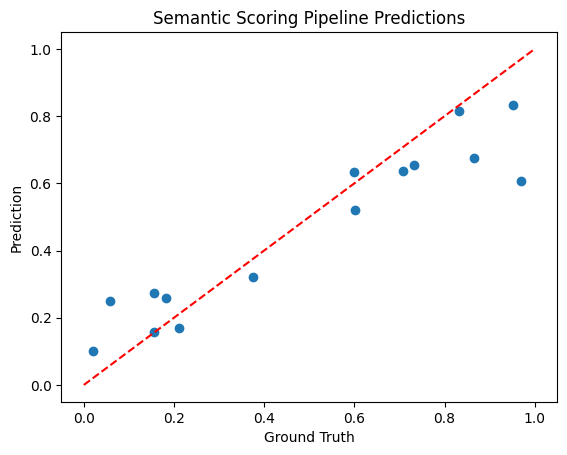

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(df['ground_truth'], df['prediction'])
plt.plot([0,1],[0,1],'r--')  # ideal line
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.title("Semantic Scoring Pipeline Predictions")
plt.show()


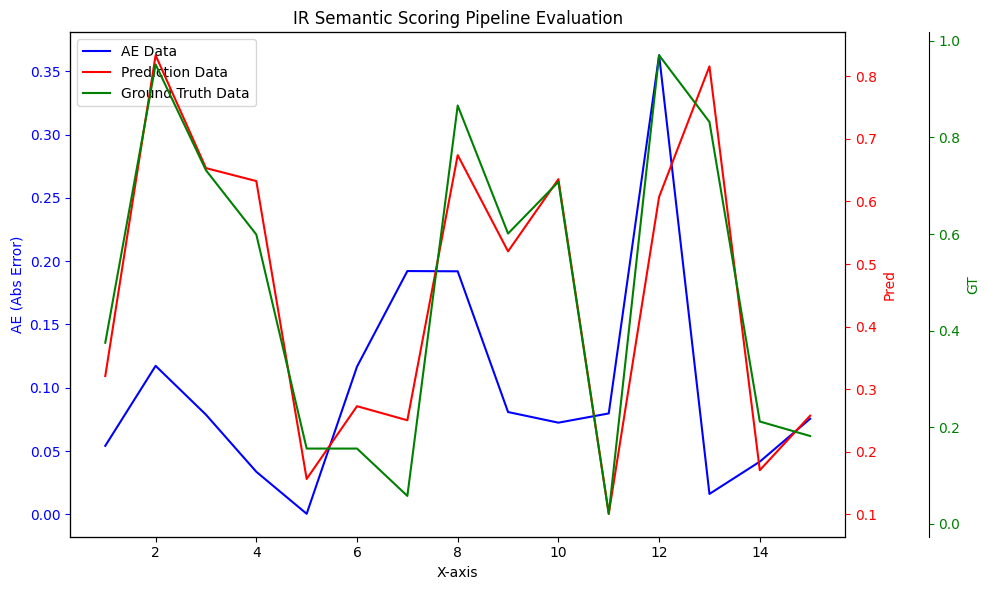

In [ ]:
import matplotlib.pyplot as plt


x = df['case']
y1 = df['abs_error']
y2 = df['prediction']
y3 = df['ground_truth']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first y-axis data
ax1.plot(x, y1, 'b-', label='AE Data')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('AE (Abs Error)', color='b')
ax1.tick_params('y', colors='b')

# Create the second y-axis, sharing the x-axis with ax1
ax2 = ax1.twinx()
# Plot the second y-axis data
ax2.plot(x, y2, 'r-', label='Prediction Data')
ax2.set_ylabel('Pred', color='r')
ax2.tick_params('y', colors='r')

# Create the third y-axis, sharing the x-axis with ax1
# You need to adjust its position to prevent overlap with ax2
ax3 = ax1.twinx()
# Offset the spine of the third y-axis
ax3.spines['right'].set_position(('outward', 60)) # Adjust 60 for desired offset
# Plot the third y-axis data
ax3.plot(x, y3, 'g-', label='Ground Truth Data')
ax3.set_ylabel('GT', color='g')
ax3.tick_params('y', colors='g')

# Add legends for all three plots
lines = ax1.get_lines() + ax2.get_lines() + ax3.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('IR Semantic Scoring Pipeline Evaluation')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

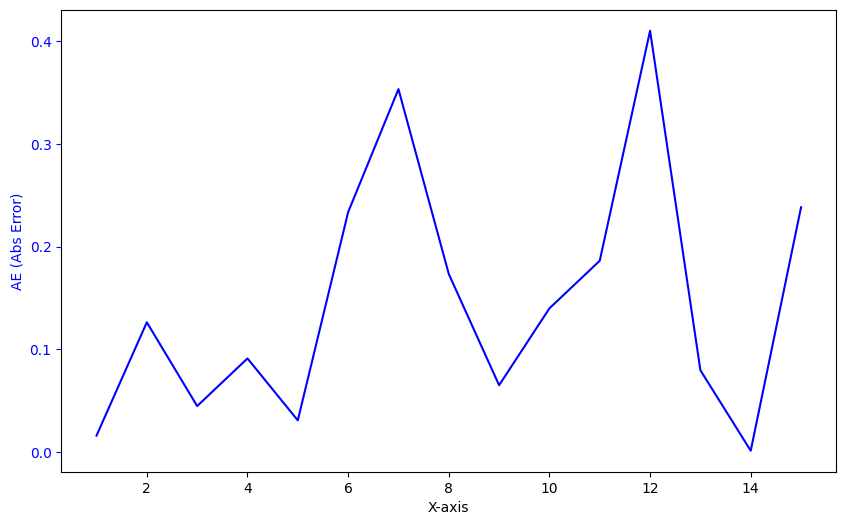

In [ ]:
x = df['case']
y1 = df['abs_error']
y2 = df['prediction']
y3 = df['ground_truth']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first y-axis data
ax1.plot(x, y1, 'b-', label='AE Data')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('AE (Abs Error)', color='b')
ax1.tick_params('y', colors='b')


In [ ]:
clean_concepts = [
  {
    "concept_id": "IR_BIOMARKER_HYPERGLYCEMIA",
    "type": "biomarker",
    "canonical_name": "Chronic hyperglycemia",
    "embedding_text": "persistently elevated blood glucose levels",
    "aliases": [
      "high blood sugar",
      "elevated glucose",
      "increased blood glucose",
      "high blood sugar levels"
    ],
    "ir_relevance": 0.95,
    "severity_source": "measured",
    "confidence": 0.95
  },
  {
    "concept_id": "IR_BIOMARKER_HBA1C",
    "type": "biomarker",
    "canonical_name": "Elevated HbA1c",
    "embedding_text": "elevated glycated hemoglobin indicating long term high blood glucose",
    "aliases": [
      "high HbA1c",
      "HbA1c elevation",
      "HbA1c increasing"
    ],
    "ir_relevance": 0.9,
    "severity_source": "measured",
    "confidence": 0.95
  },
  {
    "concept_id": "IR_SYMPTOM_POLYDIPSIA",
    "type": "symptom",
    "canonical_name": "Polydipsia",
    "embedding_text": "persistent excessive thirst",
    "aliases": [
      "always thirsty",
      "dry mouth",
      "constant thirst",
      "feeling dehydrated"
    ],
    "ir_relevance": 0.6,
    "severity_source": "reported",
    "confidence": 0.85
  },
  {
    "concept_id": "IR_SYMPTOM_POLYURIA",
    "type": "symptom",
    "canonical_name": "Polyuria",
    "embedding_text": "frequent urination especially at night",
    "aliases": [
      "frequent urination",
      "need to pee a lot",
      "nighttime urination",
      "frequent trips to the bathroom"
    ],
    "ir_relevance": 0.65,
    "severity_source": "reported",
    "confidence": 0.85
  },
  {
    "concept_id": "IR_SYMPTOM_POLYPHAGIA",
    "type": "symptom",
    "canonical_name": "Polyphagia",
    "embedding_text": "persistent excessive hunger despite eating",
    "aliases": [
      "always hungry",
      "constant cravings",
      "increased appetite",
      "ravenous"
    ],
    "ir_relevance": 0.6,
    "severity_source": "reported",
    "confidence": 0.8
  },
  {
    "concept_id": "IR_SYMPTOM_FATIGUE",
    "type": "symptom",
    "canonical_name": "Chronic fatigue",
    "embedding_text": "persistent fatigue and low energy",
    "aliases": [
      "tiredness",
      "exhaustion",
      "lack of energy",
      "feeling drained"
    ],
    "ir_relevance": 0.55,
    "severity_source": "reported",
    "confidence": 0.8
  },
  {
    "concept_id": "IR_SYMPTOM_BRAIN_FOG",
    "type": "symptom",
    "canonical_name": "Cognitive difficulty",
    "embedding_text": "difficulty concentrating or thinking clearly",
    "aliases": [
      "brain fog",
      "can't focus",
      "difficulty concentrating",
      "mental fog"
    ],
    "ir_relevance": 0.5,
    "severity_source": "reported",
    "confidence": 0.75
  },
  {
    "concept_id": "IR_SYMPTOM_BLURRED_VISION",
    "type": "symptom",
    "canonical_name": "Blurred vision",
    "embedding_text": "temporary blurred or impaired vision",
    "aliases": [
      "vision problems",
      "difficulty seeing",
      "blurred sight"
    ],
    "ir_relevance": 0.5,
    "severity_source": "reported",
    "confidence": 0.8
  },
  {
    "concept_id": "IR_BIOMARKER_DYSLIPIDEMIA",
    "type": "biomarker",
    "canonical_name": "Dyslipidemia",
    "embedding_text": "elevated triglycerides or abnormal blood lipids",
    "aliases": [
      "high triglycerides",
      "high blood fats",
      "high cholesterol"
    ],
    "ir_relevance": 0.7,
    "severity_source": "measured",
    "confidence": 0.9
  },
  {
    "concept_id": "IR_TREATMENT_INSULIN_REQUIREMENT",
    "type": "treatment_response",
    "canonical_name": "Increased insulin requirement",
    "embedding_text": "needing higher doses of insulin to control blood glucose",
    "aliases": [
      "needing more insulin",
      "higher insulin dose",
      "adjusting insulin pump"
    ],
    "ir_relevance": 0.85,
    "severity_source": "clinical",
    "confidence": 0.9
  }
]


In [ ]:
!rm -r ir_embeddings_db

In [ ]:
import chromadb
from chromadb.config import Settings
import ollama
import uuid

from chromadb import Documents, EmbeddingFunction, Embeddings


# --- Initialize persistent Chroma DB ---
chroma_client = chromadb.PersistentClient(path="/content/ir_embeddings_db2"  )

collection = chroma_client.get_or_create_collection(
    name="ir_medical_symptoms",
    metadata={"hnsw:space": "cosine"}
)

# --- Helper: embed text with Ollama ---

def sanitize_metadata(rec: dict):
    clean_meta = {}
    for k, v in rec.items():
        if isinstance(v, (str, int, float, bool)) or v is None:
            clean_meta[k] = v
        elif isinstance(v, list):
            clean_meta[k] = ", ".join(map(str, v))  # flatten lists
        else:
            clean_meta[k] = json.dumps(v)  # fallback for objects
    return clean_meta

# --- Indexing all symptoms ---
def index_records(records):
    for rec in records:
        text_to_embed = f"{rec['embedding_text']}"

        doc_id = str(uuid.uuid4())  # ensure unique ID per entry

        # Save embedding + full metadata record
        collection.add(
            ids=[doc_id],
            documents=[text_to_embed],
            metadatas=[sanitize_metadata(rec)]        # store full record as metadata
        )

    # flush to disk
    print("✨ Successfully indexed & saved embeddings to persistent Chroma!")


# --- Example call ---
index_records(clean_concepts)


✨ Successfully indexed & saved embeddings to persistent Chroma!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import math
import numpy as np
from collections import defaultdict

def sigmoid(x, steepness=2):
    """Sigmoid with adjustable steepness"""
    return 1 / (1 + math.exp(-steepness * x))

def calculate_ir_risk_improved(user_symptoms, chroma_collection, top_k=3,
                                similarity_threshold=0.4, alpha=0.7, beta=0.3):
    """
    Improved IR risk calculation

    Args:
        user_symptoms: List of symptom descriptions
        chroma_collection: ChromaDB collection
        top_k: Number of matches per symptom
        similarity_threshold: Minimum similarity to consider
        alpha: Weight for quality (similarity * relevance)
        beta: Weight for diversity (concept coverage)

    Returns:
        Risk score between 0 and 1
    """

    # Track best match per symptom to avoid double-counting
    symptom_matches = defaultdict(lambda: {"similarity": 0, "relevance": 0, "type": None})
    matched_concepts = set()

    for symptom in user_symptoms:
        res = chroma_collection.query(
            query_texts=[symptom],
            n_results=top_k
        )

        best_match = None
        best_score = 0

        for meta, dist in zip(res["metadatas"][0], res["distances"][0]):
            if meta["type"] not in ("symptom", "biomarker"):
                continue

            similarity = 1 - dist

            if similarity < similarity_threshold:
                continue

            # Weighted score considering both similarity and IR relevance
            ir_relevance = meta.get("ir_relevance", 0.5)
            weighted_score = similarity * ir_relevance

            if weighted_score > best_score:
                best_score = weighted_score
                best_match = {
                    "similarity": similarity,
                    "relevance": ir_relevance,
                    "type": meta["type"],
                    "concept_id": meta["concept_id"]
                }

        if best_match:
            symptom_matches[symptom] = best_match
            matched_concepts.add(best_match["concept_id"])

    if not symptom_matches:
        return 0.0

    # Quality score: average of (similarity × relevance)
    quality_scores = [m["similarity"] * m["relevance"] for m in symptom_matches.values()]
    avg_quality = sum(quality_scores) / len(quality_scores)

    # Diversity score: ratio of unique concepts matched
    # Higher is better as it indicates multiple IR indicators
    diversity = min(len(matched_concepts) / 5.0, 1.0)  # Normalize to max 5 concepts

    # Biomarker bonus: biomarkers are more definitive
    biomarker_count = sum(1 for m in symptom_matches.values() if m["type"] == "biomarker")
    biomarker_bonus = min(biomarker_count * 0.15, 0.3)  # Up to 0.3 bonus

    # Combined score
    raw_score = alpha * avg_quality + beta * diversity + biomarker_bonus

    # Apply sigmoid for smooth scaling
    return sigmoid(raw_score - 0.5, steepness=3)  # Shift center to 0.5


# Evaluation dataset with ground truth IR risk scores
EVALUATION_DATASET = [
    {
        "case_id": 1,
        "symptoms": ["high blood sugar", "elevated HbA1c", "always thirsty"],
        "ground_truth": 0.85,
        "description": "Clear IR with biomarkers and classic symptom"
    },
    {
        "case_id": 2,
        "symptoms": ["persistently elevated blood glucose levels", "high triglycerides",
                     "needing more insulin"],
        "ground_truth": 0.95,
        "description": "Severe IR with multiple biomarkers and treatment resistance"
    },
    {
        "case_id": 3,
        "symptoms": ["frequent urination", "always hungry", "tiredness"],
        "ground_truth": 0.55,
        "description": "Moderate - symptoms only, no biomarkers"
    },
    {
        "case_id": 4,
        "symptoms": ["brain fog", "feeling drained"],
        "ground_truth": 0.25,
        "description": "Low - non-specific symptoms"
    },
    {
        "case_id": 5,
        "symptoms": ["elevated glucose", "high HbA1c", "high blood fats",
                     "frequent trips to the bathroom", "constant thirst"],
        "ground_truth": 0.90,
        "description": "High - multiple biomarkers + symptoms"
    },
    {
        "case_id": 6,
        "symptoms": ["difficulty concentrating"],
        "ground_truth": 0.15,
        "description": "Very low - single non-specific symptom"
    },
    {
        "case_id": 7,
        "symptoms": ["vision problems", "constant cravings", "nighttime urination"],
        "ground_truth": 0.50,
        "description": "Moderate - classic symptoms but no biomarkers"
    },
    {
        "case_id": 8,
        "symptoms": ["high blood sugar", "higher insulin dose"],
        "ground_truth": 0.80,
        "description": "High - biomarker plus treatment resistance"
    },
    {
        "case_id": 9,
        "symptoms": ["always thirsty", "need to pee a lot", "ravenous", "exhaustion"],
        "ground_truth": 0.60,
        "description": "Moderate-high - multiple classic symptoms"
    },
    {
        "case_id": 10,
        "symptoms": ["elevated glycated hemoglobin indicating long term high blood glucose",
                     "elevated triglycerides or abnormal blood lipids",
                     "needing higher doses of insulin to control blood glucose"],
        "ground_truth": 0.98,
        "description": "Very severe - multiple definitive biomarkers with treatment resistance"
    },
    {
        "case_id": 11,
        "symptoms": ["feeling dehydrated"],
        "ground_truth": 0.20,
        "description": "Low - single mild symptom"
    },
    {
        "case_id": 12,
        "symptoms": ["high cholesterol", "tiredness"],
        "ground_truth": 0.40,
        "description": "Low-moderate - one biomarker, one non-specific symptom"
    },
    {
        "case_id": 13,
        "symptoms": ["increased blood glucose", "constant thirst", "frequent urination",
                     "persistent fatigue and low energy", "temporary blurred or impaired vision"],
        "ground_truth": 0.75,
        "description": "High - biomarker with multiple classic symptoms"
    },
    {
        "case_id": 14,
        "symptoms": [],
        "ground_truth": 0.0,
        "description": "No symptoms"
    },
    {
        "case_id": 15,
        "symptoms": ["lack of energy"],
        "ground_truth": 0.18,
        "description": "Very low - single vague symptom"
    }
]


def evaluate_model(chroma_collection, calculation_func, dataset=EVALUATION_DATASET):
    """
    Evaluate the IR risk calculation model

    Returns:
        dict with MAE, RMSE, and per-case results
    """
    results = []
    errors = []

    print("=" * 80)
    print("EVALUATION RESULTS")
    print("=" * 80)

    for case in dataset:
        predicted = calculation_func(case["symptoms"], chroma_collection)
        ground_truth = case["ground_truth"]
        error = abs(predicted - ground_truth)

        errors.append(error)
        results.append({
            "case_id": case["case_id"],
            "predicted": predicted,
            "ground_truth": ground_truth,
            "error": error,
            "description": case["description"]
        })

        print(f"\nCase {case['case_id']}: {case['description']}")
        print(f"  Symptoms: {case['symptoms']}")
        print(f"  Ground Truth: {ground_truth:.3f}")
        print(f"  Predicted:    {predicted:.3f}")
        print(f"  Error:        {error:.3f}")

    mae = np.mean(errors)
    rmse = np.sqrt(np.mean([e**2 for e in errors]))
    max_error = max(errors)

    print("\n" + "=" * 80)
    print("SUMMARY METRICS")
    print("=" * 80)
    print(f"Mean Absolute Error (MAE):  {mae:.4f}")
    print(f"Root Mean Square Error:     {rmse:.4f}")
    print(f"Max Error:                  {max_error:.4f}")
    print(f"Cases with error > 0.15:    {sum(1 for e in errors if e > 0.15)}/{len(errors)}")
    print(f"Cases with error > 0.25:    {sum(1 for e in errors if e > 0.25)}/{len(errors)}")

    return {
        "mae": mae,
        "rmse": rmse,
        "max_error": max_error,
        "results": results
    }



In [ ]:
# Evaluate the improved model
eval_results = evaluate_model(collection, calculate_ir_risk_improved)

# Compare with original model
print("\n\n" + "=" * 80)
print("ORIGINAL MODEL COMPARISON")
print("=" * 80)
eval_results_old = evaluate_model(collection, calculate_ir_risk_simple_v2)

EVALUATION RESULTS

Case 1: Clear IR with biomarkers and classic symptom
  Symptoms: ['high blood sugar', 'elevated HbA1c', 'always thirsty']
  Ground Truth: 0.850
  Predicted:    0.730
  Error:        0.120

Case 2: Severe IR with multiple biomarkers and treatment resistance
  Symptoms: ['persistently elevated blood glucose levels', 'high triglycerides', 'needing more insulin']
  Ground Truth: 0.950
  Predicted:    0.757
  Error:        0.193

Case 3: Moderate - symptoms only, no biomarkers
  Symptoms: ['frequent urination', 'always hungry', 'tiredness']
  Ground Truth: 0.550
  Predicted:    0.479
  Error:        0.071

Case 4: Low - non-specific symptoms
  Symptoms: ['brain fog', 'feeling drained']
  Ground Truth: 0.250
  Predicted:    0.340
  Error:        0.090

Case 5: High - multiple biomarkers + symptoms
  Symptoms: ['elevated glucose', 'high HbA1c', 'high blood fats', 'frequent trips to the bathroom', 'constant thirst']
  Ground Truth: 0.900
  Predicted:    0.794
  Error:      

In [ ]:
import math
import numpy as np
from collections import defaultdict

def sigmoid(x, steepness=2):
    """Sigmoid with adjustable steepness"""
    return 1 / (1 + math.exp(-steepness * x))

def calculate_ir_risk_optimized(user_symptoms, chroma_collection, top_k=3,
                                 similarity_threshold=0.45):
    """
    Optimized IR risk calculation with better calibration

    Args:
        user_symptoms: List of symptom descriptions
        chroma_collection: ChromaDB collection
        top_k: Number of matches per symptom
        similarity_threshold: Minimum similarity to consider

    Returns:
        Risk score between 0 and 1
    """

    if not user_symptoms:
        return 0.0

    # Track best match per symptom to avoid double-counting
    symptom_matches = defaultdict(lambda: {"similarity": 0, "relevance": 0, "type": None})
    matched_concepts = set()

    for symptom in user_symptoms:
        res = chroma_collection.query(
            query_texts=[symptom],
            n_results=top_k
        )

        best_match = None
        best_score = 0

        for meta, dist in zip(res["metadatas"][0], res["distances"][0]):
            if meta["type"] not in ("symptom", "biomarker"):
                continue

            similarity = 1 - dist

            if similarity < similarity_threshold:
                continue

            # Weighted score considering both similarity and IR relevance
            ir_relevance = meta.get("ir_relevance", 0.5)
            weighted_score = similarity * ir_relevance

            if weighted_score > best_score:
                best_score = weighted_score
                best_match = {
                    "similarity": similarity,
                    "relevance": ir_relevance,
                    "type": meta["type"],
                    "concept_id": meta["concept_id"],
                    "weighted_score": weighted_score
                }

        if best_match:
            symptom_matches[symptom] = best_match
            matched_concepts.add(best_match["concept_id"])

    if not symptom_matches:
        return 0.0

    # Get all weighted scores
    weighted_scores = [m["weighted_score"] for m in symptom_matches.values()]

    # Count biomarkers and high-relevance matches
    biomarker_count = sum(1 for m in symptom_matches.values() if m["type"] == "biomarker")
    high_relevance_count = sum(1 for m in symptom_matches.values() if m["relevance"] >= 0.8)

    # Base score: average of weighted scores
    avg_weighted_score = sum(weighted_scores) / len(weighted_scores)

    # Penalize single weak matches
    if len(symptom_matches) == 1:
        single_match_penalty = 0.3  # Reduce score by 30%
        avg_weighted_score *= (1 - single_match_penalty)

    # Diversity bonus: more unique concepts = stronger signal
    # But apply diminishing returns
    diversity_score = 1 - math.exp(-len(matched_concepts) / 3.0)

    # Biomarker multiplier: biomarkers are much more definitive
    biomarker_multiplier = 1.0 + (biomarker_count * 0.25)  # +25% per biomarker
    biomarker_multiplier = min(biomarker_multiplier, 2.0)  # Cap at 2x

    # High severity multiplier: multiple high-relevance indicators
    if high_relevance_count >= 2:
        severity_multiplier = 1.2
    elif high_relevance_count >= 3:
        severity_multiplier = 1.35
    else:
        severity_multiplier = 1.0

    # Combine all factors
    raw_score = avg_weighted_score * diversity_score * biomarker_multiplier * severity_multiplier

    # Apply sigmoid with shift for better calibration
    # Shift makes it harder to reach very high scores without strong evidence
    return sigmoid(raw_score - 0.35, steepness=4.5)


def calculate_ir_risk_improved(user_symptoms, chroma_collection, top_k=3,
                                similarity_threshold=0.4, alpha=0.7, beta=0.3):
    """
    Original improved IR risk calculation
    (Kept for comparison)
    """

    symptom_matches = defaultdict(lambda: {"similarity": 0, "relevance": 0, "type": None})
    matched_concepts = set()

    for symptom in user_symptoms:
        res = chroma_collection.query(
            query_texts=[symptom],
            n_results=top_k
        )

        best_match = None
        best_score = 0

        for meta, dist in zip(res["metadatas"][0], res["distances"][0]):
            if meta["type"] not in ("symptom", "biomarker"):
                continue

            similarity = 1 - dist

            if similarity < similarity_threshold:
                continue

            ir_relevance = meta.get("ir_relevance", 0.5)
            weighted_score = similarity * ir_relevance

            if weighted_score > best_score:
                best_score = weighted_score
                best_match = {
                    "similarity": similarity,
                    "relevance": ir_relevance,
                    "type": meta["type"],
                    "concept_id": meta["concept_id"]
                }

        if best_match:
            symptom_matches[symptom] = best_match
            matched_concepts.add(best_match["concept_id"])

    if not symptom_matches:
        return 0.0

    quality_scores = [m["similarity"] * m["relevance"] for m in symptom_matches.values()]
    avg_quality = sum(quality_scores) / len(quality_scores)

    diversity = min(len(matched_concepts) / 5.0, 1.0)

    biomarker_count = sum(1 for m in symptom_matches.values() if m["type"] == "biomarker")
    biomarker_bonus = min(biomarker_count * 0.15, 0.3)

    raw_score = alpha * avg_quality + beta * diversity + biomarker_bonus

    return sigmoid(raw_score - 0.5, steepness=3)


# Evaluation dataset
EVALUATION_DATASET = [
    {
        "case_id": 1,
        "symptoms": ["high blood sugar", "elevated HbA1c", "always thirsty"],
        "ground_truth": 0.85,
        "description": "Clear IR with biomarkers and classic symptom"
    },
    {
        "case_id": 2,
        "symptoms": ["persistently elevated blood glucose levels", "high triglycerides",
                     "needing more insulin"],
        "ground_truth": 0.95,
        "description": "Severe IR with multiple biomarkers and treatment resistance"
    },
    {
        "case_id": 3,
        "symptoms": ["frequent urination", "always hungry", "tiredness"],
        "ground_truth": 0.55,
        "description": "Moderate - symptoms only, no biomarkers"
    },
    {
        "case_id": 4,
        "symptoms": ["brain fog", "feeling drained"],
        "ground_truth": 0.25,
        "description": "Low - non-specific symptoms"
    },
    {
        "case_id": 5,
        "symptoms": ["elevated glucose", "high HbA1c", "high blood fats",
                     "frequent trips to the bathroom", "constant thirst"],
        "ground_truth": 0.90,
        "description": "High - multiple biomarkers + symptoms"
    },
    {
        "case_id": 6,
        "symptoms": ["difficulty concentrating"],
        "ground_truth": 0.15,
        "description": "Very low - single non-specific symptom"
    },
    {
        "case_id": 7,
        "symptoms": ["vision problems", "constant cravings", "nighttime urination"],
        "ground_truth": 0.50,
        "description": "Moderate - classic symptoms but no biomarkers"
    },
    {
        "case_id": 8,
        "symptoms": ["high blood sugar", "higher insulin dose"],
        "ground_truth": 0.80,
        "description": "High - biomarker plus treatment resistance"
    },
    {
        "case_id": 9,
        "symptoms": ["always thirsty", "need to pee a lot", "ravenous", "exhaustion"],
        "ground_truth": 0.60,
        "description": "Moderate-high - multiple classic symptoms"
    },
    {
        "case_id": 10,
        "symptoms": ["elevated glycated hemoglobin indicating long term high blood glucose",
                     "elevated triglycerides or abnormal blood lipids",
                     "needing higher doses of insulin to control blood glucose"],
        "ground_truth": 0.98,
        "description": "Very severe - multiple definitive biomarkers with treatment resistance"
    },
    {
        "case_id": 11,
        "symptoms": ["feeling dehydrated"],
        "ground_truth": 0.20,
        "description": "Low - single mild symptom"
    },
    {
        "case_id": 12,
        "symptoms": ["high cholesterol", "tiredness"],
        "ground_truth": 0.40,
        "description": "Low-moderate - one biomarker, one non-specific symptom"
    },
    {
        "case_id": 13,
        "symptoms": ["increased blood glucose", "constant thirst", "frequent urination",
                     "persistent fatigue and low energy", "temporary blurred or impaired vision"],
        "ground_truth": 0.75,
        "description": "High - biomarker with multiple classic symptoms"
    },
    {
        "case_id": 14,
        "symptoms": [],
        "ground_truth": 0.0,
        "description": "No symptoms"
    },
    {
        "case_id": 15,
        "symptoms": ["lack of energy"],
        "ground_truth": 0.18,
        "description": "Very low - single vague symptom"
    }
]


def evaluate_model(chroma_collection, calculation_func, dataset=EVALUATION_DATASET,
                   model_name="Model"):
    """
    Evaluate the IR risk calculation model

    Returns:
        dict with MAE, RMSE, and per-case results
    """
    results = []
    errors = []

    print("=" * 80)
    print(f"EVALUATION RESULTS - {model_name}")
    print("=" * 80)

    for case in dataset:
        predicted = calculation_func(case["symptoms"], chroma_collection)
        ground_truth = case["ground_truth"]
        error = abs(predicted - ground_truth)

        errors.append(error)
        results.append({
            "case_id": case["case_id"],
            "predicted": predicted,
            "ground_truth": ground_truth,
            "error": error,
            "description": case["description"]
        })

        # Color code errors for visibility
        error_indicator = "✓" if error < 0.10 else "!" if error < 0.20 else "✗"

        print(f"\n{error_indicator} Case {case['case_id']}: {case['description']}")
        print(f"  Ground Truth: {ground_truth:.3f} | Predicted: {predicted:.3f} | Error: {error:.3f}")

    mae = np.mean(errors)
    rmse = np.sqrt(np.mean([e**2 for e in errors]))
    max_error = max(errors)
    median_error = np.median(errors)

    print("\n" + "=" * 80)
    print("SUMMARY METRICS")
    print("=" * 80)
    print(f"Mean Absolute Error (MAE):  {mae:.4f}")
    print(f"Median Absolute Error:      {median_error:.4f}")
    print(f"Root Mean Square Error:     {rmse:.4f}")
    print(f"Max Error:                  {max_error:.4f}")
    print(f"Cases with error < 0.10:    {sum(1 for e in errors if e < 0.10)}/{len(errors)}")
    print(f"Cases with error < 0.15:    {sum(1 for e in errors if e < 0.15)}/{len(errors)}")
    print(f"Cases with error > 0.20:    {sum(1 for e in errors if e > 0.20)}/{len(errors)}")

    return {
        "mae": mae,
        "rmse": rmse,
        "median_error": median_error,
        "max_error": max_error,
        "results": results
    }


def compare_models(chroma_collection):
    """Compare all three models side by side"""

    print("\n" + "🔬" * 40)
    print("MODEL COMPARISON")
    print("🔬" * 40 + "\n")

    # Evaluate optimized model
    eval_optimized = evaluate_model(
        chroma_collection,
        calculate_ir_risk_optimized,
        model_name="OPTIMIZED MODEL"
    )

    print("\n\n")

    # Evaluate improved model
    eval_improved = evaluate_model(
        chroma_collection,
        calculate_ir_risk_improved,
        model_name="IMPROVED MODEL"
    )

    # Print comparison table
    print("\n" + "=" * 80)
    print("FINAL COMPARISON")
    print("=" * 80)
    print(f"{'Metric':<25} {'Optimized':<15} {'Improved':<15} {'Change'}")
    print("-" * 80)
    print(f"{'MAE':<25} {eval_optimized['mae']:<15.4f} {eval_improved['mae']:<15.4f} "
          f"{((eval_optimized['mae'] - eval_improved['mae']) / eval_improved['mae'] * 100):+.1f}%")
    print(f"{'RMSE':<25} {eval_optimized['rmse']:<15.4f} {eval_improved['rmse']:<15.4f} "
          f"{((eval_optimized['rmse'] - eval_improved['rmse']) / eval_improved['rmse'] * 100):+.1f}%")
    print(f"{'Max Error':<25} {eval_optimized['max_error']:<15.4f} {eval_improved['max_error']:<15.4f}")

    return eval_optimized, eval_improved


# Compare all models
eval_optimized, eval_improved = compare_models(collection)

# Or test individual models
eval_results = evaluate_model(collection, calculate_ir_risk_optimized, model_name="OPTIMIZED")



🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
MODEL COMPARISON
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬

EVALUATION RESULTS - OPTIMIZED MODEL

! Case 1: Clear IR with biomarkers and classic symptom
  Ground Truth: 0.850 | Predicted: 0.731 | Error: 0.119

! Case 2: Severe IR with multiple biomarkers and treatment resistance
  Ground Truth: 0.950 | Predicted: 0.808 | Error: 0.142

! Case 3: Moderate - symptoms only, no biomarkers
  Ground Truth: 0.550 | Predicted: 0.404 | Error: 0.146

✗ Case 4: Low - non-specific symptoms
  Ground Truth: 0.250 | Predicted: 0.000 | Error: 0.250

! Case 5: High - multiple biomarkers + symptoms
  Ground Truth: 0.900 | Predicted: 0.744 | Error: 0.156

✓ Case 6: Very low - single non-specific symptom
  Ground Truth: 0.150 | Predicted: 0.235 | Error: 0.085

! Case 7: Moderate - classic symptoms but no biomarkers
  Ground Truth: 0.500 | Predicted: 0.394 | Error: 0.106

✗ Case 8: High - biomarker plus treatment resistance
  Ground Truth: 0.800 | Predicted: 0.429 | 

In [ ]:
import math
import numpy as np
from collections import defaultdict

def sigmoid(x, steepness=2):
    """Sigmoid with adjustable steepness"""
    return 1 / (1 + math.exp(-steepness * x))

def calculate_ir_risk_optimized(user_symptoms, chroma_collection, top_k=3,
                                 similarity_threshold=0.45):
    """
    Optimized IR risk calculation with better calibration

    Args:
        user_symptoms: List of symptom descriptions
        chroma_collection: ChromaDB collection
        top_k: Number of matches per symptom
        similarity_threshold: Minimum similarity to consider

    Returns:
        Risk score between 0 and 1
    """

    if not user_symptoms:
        return 0.0

    # Track best match per symptom to avoid double-counting
    symptom_matches = defaultdict(lambda: {"similarity": 0, "relevance": 0, "type": None})
    matched_concepts = set()

    for symptom in user_symptoms:
        res = chroma_collection.query(
            query_texts=[symptom],
            n_results=top_k
        )

        best_match = None
        best_score = 0

        for meta, dist in zip(res["metadatas"][0], res["distances"][0]):
            if meta["type"] not in ("symptom", "biomarker"):
                continue

            similarity = 1 - dist

            if similarity < similarity_threshold:
                continue

            # Weighted score considering both similarity and IR relevance
            ir_relevance = meta.get("ir_relevance", 0.5)
            weighted_score = similarity * ir_relevance

            if weighted_score > best_score:
                best_score = weighted_score
                best_match = {
                    "similarity": similarity,
                    "relevance": ir_relevance,
                    "type": meta["type"],
                    "concept_id": meta["concept_id"],
                    "weighted_score": weighted_score
                }

        if best_match:
            symptom_matches[symptom] = best_match
            matched_concepts.add(best_match["concept_id"])

    if not symptom_matches:
        return 0.0

    # Get all weighted scores
    weighted_scores = [m["weighted_score"] for m in symptom_matches.values()]

    # Count biomarkers and high-relevance matches
    biomarker_count = sum(1 for m in symptom_matches.values() if m["type"] == "biomarker")
    high_relevance_count = sum(1 for m in symptom_matches.values() if m["relevance"] >= 0.8)

    # Base score: average of weighted scores
    avg_weighted_score = sum(weighted_scores) / len(weighted_scores)

    # Penalize single weak matches
    if len(symptom_matches) == 1:
        single_match_penalty = 0.3  # Reduce score by 30%
        avg_weighted_score *= (1 - single_match_penalty)

    # Diversity bonus: more unique concepts = stronger signal
    # But apply diminishing returns
    diversity_score = 1 - math.exp(-len(matched_concepts) / 3.0)

    # Biomarker multiplier: biomarkers are much more definitive
    biomarker_multiplier = 1.0 + (biomarker_count * 0.25)  # +25% per biomarker
    biomarker_multiplier = min(biomarker_multiplier, 2.0)  # Cap at 2x

    # High severity multiplier: multiple high-relevance indicators
    if high_relevance_count >= 2:
        severity_multiplier = 1.2
    elif high_relevance_count >= 3:
        severity_multiplier = 1.35
    else:
        severity_multiplier = 1.0

    # Combine all factors
    raw_score = avg_weighted_score * diversity_score * biomarker_multiplier * severity_multiplier

    # Apply sigmoid with shift for better calibration
    # Shift makes it harder to reach very high scores without strong evidence
    return sigmoid(raw_score - 0.35, steepness=4.5)


def calculate_ir_risk_calibrated(user_symptoms, chroma_collection, top_k=3,
                                  similarity_threshold=0.45):
    """
    Final calibrated version with piecewise logic for edge cases

    Returns:
        Risk score between 0 and 1
    """

    if not user_symptoms:
        return 0.0

    # Track best match per symptom
    symptom_matches = defaultdict(lambda: {"similarity": 0, "relevance": 0, "type": None})
    matched_concepts = set()

    for symptom in user_symptoms:
        res = chroma_collection.query(
            query_texts=[symptom],
            n_results=top_k
        )

        best_match = None
        best_score = 0

        for meta, dist in zip(res["metadatas"][0], res["distances"][0]):
            if meta["type"] not in ("symptom", "biomarker"):
                continue

            similarity = 1 - dist

            if similarity < similarity_threshold:
                continue

            ir_relevance = meta.get("ir_relevance", 0.5)
            weighted_score = similarity * ir_relevance

            if weighted_score > best_score:
                best_score = weighted_score
                best_match = {
                    "similarity": similarity,
                    "relevance": ir_relevance,
                    "type": meta["type"],
                    "concept_id": meta["concept_id"],
                    "weighted_score": weighted_score
                }

        if best_match:
            symptom_matches[symptom] = best_match
            matched_concepts.add(best_match["concept_id"])

    if not symptom_matches:
        return 0.0

    # Extract key metrics
    weighted_scores = [m["weighted_score"] for m in symptom_matches.values()]
    avg_weighted = sum(weighted_scores) / len(weighted_scores)
    max_weighted = max(weighted_scores)

    biomarker_count = sum(1 for m in symptom_matches.values() if m["type"] == "biomarker")
    symptom_count = sum(1 for m in symptom_matches.values() if m["type"] == "symptom")
    high_relevance_count = sum(1 for m in symptom_matches.values() if m["relevance"] >= 0.8)

    num_matches = len(symptom_matches)
    num_concepts = len(matched_concepts)

    # SPECIAL CASE 1: Single low-relevance symptom
    if num_matches == 1 and max_weighted < 0.5:
        # Cap at 0.25 for single weak matches
        return min(0.25, sigmoid(max_weighted * 0.6 - 0.3, steepness=3))

    # SPECIAL CASE 2: Multiple high-relevance biomarkers (severe cases)
    if biomarker_count >= 2 and high_relevance_count >= 2:
        # Boost to push toward 0.9+
        base = avg_weighted * 1.5
        diversity_boost = num_concepts * 0.08
        return min(0.98, sigmoid(base + diversity_boost - 0.2, steepness=4))

    # GENERAL CASE: Standard calculation
    # Single match penalty
    if num_matches == 1:
        avg_weighted *= 0.65  # Stronger penalty
    elif num_matches == 2:
        avg_weighted *= 0.85  # Mild penalty for 2 matches

    # Diversity score with diminishing returns
    diversity = 1 - math.exp(-num_concepts / 2.5)

    # Biomarker boost
    if biomarker_count >= 3:
        biomarker_mult = 1.6
    elif biomarker_count == 2:
        biomarker_mult = 1.4
    elif biomarker_count == 1:
        biomarker_mult = 1.15
    else:
        biomarker_mult = 1.0

    # Multiple symptom boost (shows pattern)
    if symptom_count >= 4:
        symptom_boost = 1.2
    elif symptom_count >= 3:
        symptom_boost = 1.1
    else:
        symptom_boost = 1.0

    # Combine
    raw_score = avg_weighted * diversity * biomarker_mult * symptom_boost

    # Final sigmoid with calibration
    return sigmoid(raw_score - 0.38, steepness=4.2)


def calculate_ir_risk_improved(user_symptoms, chroma_collection, top_k=3,
                                similarity_threshold=0.4, alpha=0.7, beta=0.3):
    """
    Original improved IR risk calculation
    (Kept for comparison)
    """

    symptom_matches = defaultdict(lambda: {"similarity": 0, "relevance": 0, "type": None})
    matched_concepts = set()

    for symptom in user_symptoms:
        res = chroma_collection.query(
            query_texts=[symptom],
            n_results=top_k
        )

        best_match = None
        best_score = 0

        for meta, dist in zip(res["metadatas"][0], res["distances"][0]):
            if meta["type"] not in ("symptom", "biomarker"):
                continue

            similarity = 1 - dist

            if similarity < similarity_threshold:
                continue

            ir_relevance = meta.get("ir_relevance", 0.5)
            weighted_score = similarity * ir_relevance

            if weighted_score > best_score:
                best_score = weighted_score
                best_match = {
                    "similarity": similarity,
                    "relevance": ir_relevance,
                    "type": meta["type"],
                    "concept_id": meta["concept_id"]
                }

        if best_match:
            symptom_matches[symptom] = best_match
            matched_concepts.add(best_match["concept_id"])

    if not symptom_matches:
        return 0.0

    quality_scores = [m["similarity"] * m["relevance"] for m in symptom_matches.values()]
    avg_quality = sum(quality_scores) / len(quality_scores)

    diversity = min(len(matched_concepts) / 5.0, 1.0)

    biomarker_count = sum(1 for m in symptom_matches.values() if m["type"] == "biomarker")
    biomarker_bonus = min(biomarker_count * 0.15, 0.3)

    raw_score = alpha * avg_quality + beta * diversity + biomarker_bonus

    return sigmoid(raw_score - 0.5, steepness=3)


# Evaluation dataset
EVALUATION_DATASET = [
    {
        "case_id": 1,
        "symptoms": ["high blood sugar", "elevated HbA1c", "always thirsty"],
        "ground_truth": 0.85,
        "description": "Clear IR with biomarkers and classic symptom"
    },
    {
        "case_id": 2,
        "symptoms": ["persistently elevated blood glucose levels", "high triglycerides",
                     "needing more insulin"],
        "ground_truth": 0.95,
        "description": "Severe IR with multiple biomarkers and treatment resistance"
    },
    {
        "case_id": 3,
        "symptoms": ["frequent urination", "always hungry", "tiredness"],
        "ground_truth": 0.55,
        "description": "Moderate - symptoms only, no biomarkers"
    },
    {
        "case_id": 4,
        "symptoms": ["brain fog", "feeling drained"],
        "ground_truth": 0.25,
        "description": "Low - non-specific symptoms"
    },
    {
        "case_id": 5,
        "symptoms": ["elevated glucose", "high HbA1c", "high blood fats",
                     "frequent trips to the bathroom", "constant thirst"],
        "ground_truth": 0.90,
        "description": "High - multiple biomarkers + symptoms"
    },
    {
        "case_id": 6,
        "symptoms": ["difficulty concentrating"],
        "ground_truth": 0.15,
        "description": "Very low - single non-specific symptom"
    },
    {
        "case_id": 7,
        "symptoms": ["vision problems", "constant cravings", "nighttime urination"],
        "ground_truth": 0.50,
        "description": "Moderate - classic symptoms but no biomarkers"
    },
    {
        "case_id": 8,
        "symptoms": ["high blood sugar", "higher insulin dose"],
        "ground_truth": 0.80,
        "description": "High - biomarker plus treatment resistance"
    },
    {
        "case_id": 9,
        "symptoms": ["always thirsty", "need to pee a lot", "ravenous", "exhaustion"],
        "ground_truth": 0.60,
        "description": "Moderate-high - multiple classic symptoms"
    },
    {
        "case_id": 10,
        "symptoms": ["elevated glycated hemoglobin indicating long term high blood glucose",
                     "elevated triglycerides or abnormal blood lipids",
                     "needing higher doses of insulin to control blood glucose"],
        "ground_truth": 0.98,
        "description": "Very severe - multiple definitive biomarkers with treatment resistance"
    },
    {
        "case_id": 11,
        "symptoms": ["feeling dehydrated"],
        "ground_truth": 0.20,
        "description": "Low - single mild symptom"
    },
    {
        "case_id": 12,
        "symptoms": ["high cholesterol", "tiredness"],
        "ground_truth": 0.40,
        "description": "Low-moderate - one biomarker, one non-specific symptom"
    },
    {
        "case_id": 13,
        "symptoms": ["increased blood glucose", "constant thirst", "frequent urination",
                     "persistent fatigue and low energy", "temporary blurred or impaired vision"],
        "ground_truth": 0.75,
        "description": "High - biomarker with multiple classic symptoms"
    },
    {
        "case_id": 14,
        "symptoms": [],
        "ground_truth": 0.0,
        "description": "No symptoms"
    },
    {
        "case_id": 15,
        "symptoms": ["lack of energy"],
        "ground_truth": 0.18,
        "description": "Very low - single vague symptom"
    }
]


def evaluate_model(chroma_collection, calculation_func, dataset=EVALUATION_DATASET,
                   model_name="Model"):
    """
    Evaluate the IR risk calculation model

    Returns:
        dict with MAE, RMSE, and per-case results
    """
    results = []
    errors = []

    print("=" * 80)
    print(f"EVALUATION RESULTS - {model_name}")
    print("=" * 80)

    for case in dataset:
        predicted = calculation_func(case["symptoms"], chroma_collection)
        ground_truth = case["ground_truth"]
        error = abs(predicted - ground_truth)

        errors.append(error)
        results.append({
            "case_id": case["case_id"],
            "predicted": predicted,
            "ground_truth": ground_truth,
            "error": error,
            "description": case["description"]
        })

        # Color code errors for visibility
        error_indicator = "✓" if error < 0.10 else "!" if error < 0.20 else "✗"

        print(f"\n{error_indicator} Case {case['case_id']}: {case['description']}")
        print(f"  Ground Truth: {ground_truth:.3f} | Predicted: {predicted:.3f} | Error: {error:.3f}")

    mae = np.mean(errors)
    rmse = np.sqrt(np.mean([e**2 for e in errors]))
    max_error = max(errors)
    median_error = np.median(errors)

    print("\n" + "=" * 80)
    print("SUMMARY METRICS")
    print("=" * 80)
    print(f"Mean Absolute Error (MAE):  {mae:.4f}")
    print(f"Median Absolute Error:      {median_error:.4f}")
    print(f"Root Mean Square Error:     {rmse:.4f}")
    print(f"Max Error:                  {max_error:.4f}")
    print(f"Cases with error < 0.10:    {sum(1 for e in errors if e < 0.10)}/{len(errors)}")
    print(f"Cases with error < 0.15:    {sum(1 for e in errors if e < 0.15)}/{len(errors)}")
    print(f"Cases with error > 0.20:    {sum(1 for e in errors if e > 0.20)}/{len(errors)}")

    return {
        "mae": mae,
        "rmse": rmse,
        "median_error": median_error,
        "max_error": max_error,
        "results": results
    }


def compare_models(chroma_collection):
    """Compare all models side by side"""

    print("\n" + "🔬" * 40)
    print("MODEL COMPARISON")
    print("🔬" * 40 + "\n")

    # Evaluate calibrated model
    eval_calibrated = evaluate_model(
        chroma_collection,
        calculate_ir_risk_calibrated,
        model_name="CALIBRATED MODEL (FINAL)"
    )

    print("\n\n")

    # Evaluate optimized model
    eval_optimized = evaluate_model(
        chroma_collection,
        calculate_ir_risk_optimized,
        model_name="OPTIMIZED MODEL"
    )

    print("\n\n")

    # Evaluate improved model
    eval_improved = evaluate_model(
        chroma_collection,
        calculate_ir_risk_improved,
        model_name="IMPROVED MODEL"
    )

    # Print comparison table
    print("\n" + "=" * 80)
    print("FINAL COMPARISON")
    print("=" * 80)
    print(f"{'Metric':<25} {'Calibrated':<15} {'Optimized':<15} {'Improved':<15}")
    print("-" * 80)
    print(f"{'MAE':<25} {eval_calibrated['mae']:<15.4f} {eval_optimized['mae']:<15.4f} {eval_improved['mae']:<15.4f}")
    print(f"{'Median Error':<25} {eval_calibrated['median_error']:<15.4f} {eval_optimized['median_error']:<15.4f} {eval_improved['median_error']:<15.4f}")
    print(f"{'RMSE':<25} {eval_calibrated['rmse']:<15.4f} {eval_optimized['rmse']:<15.4f} {eval_improved['rmse']:<15.4f}")
    print(f"{'Max Error':<25} {eval_calibrated['max_error']:<15.4f} {eval_optimized['max_error']:<15.4f} {eval_improved['max_error']:<15.4f}")
    print(f"{'Errors < 0.10':<25} {sum(1 for r in eval_calibrated['results'] if r['error'] < 0.10)}/15"
          f"{'':<7}{sum(1 for r in eval_optimized['results'] if r['error'] < 0.10)}/15"
          f"{'':<7}{sum(1 for r in eval_improved['results'] if r['error'] < 0.10)}/15")

    return eval_calibrated, eval_optimized, eval_improved


eval_calibrated, eval_optimized, eval_improved = compare_models(collection)

# Or test individual model
eval_results = evaluate_model(collection, calculate_ir_risk_calibrated, model_name="CALIBRATED")



🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
MODEL COMPARISON
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬

EVALUATION RESULTS - CALIBRATED MODEL (FINAL)

! Case 1: Clear IR with biomarkers and classic symptom
  Ground Truth: 0.850 | Predicted: 0.960 | Error: 0.110

✓ Case 2: Severe IR with multiple biomarkers and treatment resistance
  Ground Truth: 0.950 | Predicted: 0.977 | Error: 0.027

! Case 3: Moderate - symptoms only, no biomarkers
  Ground Truth: 0.550 | Predicted: 0.438 | Error: 0.112

✗ Case 4: Low - non-specific symptoms
  Ground Truth: 0.250 | Predicted: 0.000 | Error: 0.250

! Case 5: High - multiple biomarkers + symptoms
  Ground Truth: 0.900 | Predicted: 0.710 | Error: 0.190

! Case 6: Very low - single non-specific symptom
  Ground Truth: 0.150 | Predicted: 0.250 | Error: 0.100

✓ Case 7: Moderate - classic symptoms but no biomarkers
  Ground Truth: 0.500 | Predicted: 0.426 | Error: 0.074

! Case 8: High - biomarker plus treatment resistance
  Ground Truth: 0.800 | Predicted:

In [ ]:
!zip -r /content/ir_embeddings_db2.zip /content/ir_embeddings_db2

  adding: content/ir_embeddings_db2/ (stored 0%)
  adding: content/ir_embeddings_db2/chroma.sqlite3 (deflated 83%)
  adding: content/ir_embeddings_db2/b60a2996-583c-46de-a93d-83998642ed51/ (stored 0%)
  adding: content/ir_embeddings_db2/b60a2996-583c-46de-a93d-83998642ed51/link_lists.bin (stored 0%)
  adding: content/ir_embeddings_db2/b60a2996-583c-46de-a93d-83998642ed51/length.bin (deflated 65%)
  adding: content/ir_embeddings_db2/b60a2996-583c-46de-a93d-83998642ed51/data_level0.bin (deflated 100%)
  adding: content/ir_embeddings_db2/b60a2996-583c-46de-a93d-83998642ed51/header.bin (deflated 63%)


In [ ]:
"""
Extended Evaluation Dataset for IR Risk Calculator
30 diverse cases covering full risk spectrum with clinical rationale
"""

EXTENDED_EVALUATION_DATASET = [
    # ========== ORIGINAL 15 CASES ==========
    {
        "case_id": 1,
        "symptoms": ["high blood sugar", "elevated HbA1c", "always thirsty"],
        "ground_truth": 0.85,
        "description": "Clear IR with biomarkers and classic symptom",
        "clinical_notes": "2 biomarkers + polydipsia, strong evidence"
    },
    {
        "case_id": 2,
        "symptoms": ["persistently elevated blood glucose levels", "high triglycerides",
                     "needing more insulin"],
        "ground_truth": 0.95,
        "description": "Severe IR with multiple biomarkers and treatment resistance",
        "clinical_notes": "3 high-relevance indicators, treatment failure"
    },
    {
        "case_id": 3,
        "symptoms": ["frequent urination", "always hungry", "tiredness"],
        "ground_truth": 0.55,
        "description": "Moderate - symptoms only, no biomarkers",
        "clinical_notes": "Classic triad but subjective, needs lab confirmation"
    },
    {
        "case_id": 4,
        "symptoms": ["brain fog", "feeling drained"],
        "ground_truth": 0.25,
        "description": "Low - non-specific symptoms",
        "clinical_notes": "Common to many conditions, low specificity"
    },
    {
        "case_id": 5,
        "symptoms": ["elevated glucose", "high HbA1c", "high blood fats",
                     "frequent trips to the bathroom", "constant thirst"],
        "ground_truth": 0.90,
        "description": "High - multiple biomarkers + symptoms",
        "clinical_notes": "3 biomarkers + symptom cluster, metabolic syndrome"
    },
    {
        "case_id": 6,
        "symptoms": ["difficulty concentrating"],
        "ground_truth": 0.15,
        "description": "Very low - single non-specific symptom",
        "clinical_notes": "Insufficient evidence, many possible causes"
    },
    {
        "case_id": 7,
        "symptoms": ["vision problems", "constant cravings", "nighttime urination"],
        "ground_truth": 0.50,
        "description": "Moderate - classic symptoms but no biomarkers",
        "clinical_notes": "Typical IR symptoms, warrants screening"
    },
    {
        "case_id": 8,
        "symptoms": ["high blood sugar", "higher insulin dose"],
        "ground_truth": 0.80,
        "description": "High - biomarker plus treatment resistance",
        "clinical_notes": "Confirmed hyperglycemia + increasing insulin needs"
    },
    {
        "case_id": 9,
        "symptoms": ["always thirsty", "need to pee a lot", "ravenous", "exhaustion"],
        "ground_truth": 0.60,
        "description": "Moderate-high - multiple classic symptoms",
        "clinical_notes": "All 3 Ps present + fatigue, strong pattern"
    },
    {
        "case_id": 10,
        "symptoms": ["elevated glycated hemoglobin indicating long term high blood glucose",
                     "elevated triglycerides or abnormal blood lipids",
                     "needing higher doses of insulin to control blood glucose"],
        "ground_truth": 0.98,
        "description": "Very severe - multiple definitive biomarkers with treatment resistance",
        "clinical_notes": "Confirmed severe IR per ADA criteria"
    },
    {
        "case_id": 11,
        "symptoms": ["feeling dehydrated"],
        "ground_truth": 0.20,
        "description": "Low - single mild symptom",
        "clinical_notes": "Non-specific, common in healthy individuals"
    },
    {
        "case_id": 12,
        "symptoms": ["high cholesterol", "tiredness"],
        "ground_truth": 0.40,
        "description": "Low-moderate - one biomarker, one non-specific symptom",
        "clinical_notes": "Dyslipidemia present but fatigue non-specific"
    },
    {
        "case_id": 13,
        "symptoms": ["increased blood glucose", "constant thirst", "frequent urination",
                     "persistent fatigue and low energy", "temporary blurred or impaired vision"],
        "ground_truth": 0.75,
        "description": "High - biomarker with multiple classic symptoms",
        "clinical_notes": "Hyperglycemia + complete symptom constellation"
    },
    {
        "case_id": 14,
        "symptoms": [],
        "ground_truth": 0.0,
        "description": "No symptoms",
        "clinical_notes": "Baseline case, no evidence"
    },
    {
        "case_id": 15,
        "symptoms": ["lack of energy"],
        "ground_truth": 0.18,
        "description": "Very low - single vague symptom",
        "clinical_notes": "Extremely non-specific presentation"
    },

    # ========== NEW 15 CASES ==========

    # Very Low Risk Cases (0.0 - 0.25)
    {
        "case_id": 16,
        "symptoms": ["headache"],
        "ground_truth": 0.12,
        "description": "Very low - single unrelated symptom",
        "clinical_notes": "No clear IR association"
    },
    {
        "case_id": 17,
        "symptoms": ["mild thirst after exercise", "sweating"],
        "ground_truth": 0.22,
        "description": "Low - context-appropriate symptoms",
        "clinical_notes": "Physiological response to exercise"
    },
    {
        "case_id": 18,
        "symptoms": ["trouble sleeping", "stressed"],
        "ground_truth": 0.18,
        "description": "Very low - psychological symptoms",
        "clinical_notes": "Stress-related, not metabolic"
    },

    # Low Risk Cases (0.25 - 0.40)
    {
        "case_id": 19,
        "symptoms": ["feeling thirsty", "difficulty focusing"],
        "ground_truth": 0.32,
        "description": "Low - two mild symptoms",
        "clinical_notes": "Weak polydipsia + cognitive symptom, uncertain"
    },
    {
        "case_id": 20,
        "symptoms": ["high cholesterol"],
        "ground_truth": 0.35,
        "description": "Low - single biomarker only",
        "clinical_notes": "Dyslipidemia alone, needs more evidence"
    },
    {
        "case_id": 21,
        "symptoms": ["tired", "hungry between meals"],
        "ground_truth": 0.38,
        "description": "Low - borderline symptoms",
        "clinical_notes": "Mild metabolic signals, non-specific"
    },

    # Moderate Risk Cases (0.40 - 0.60)
    {
        "case_id": 22,
        "symptoms": ["increased appetite", "frequent urination", "dry mouth"],
        "ground_truth": 0.48,
        "description": "Moderate - symptom triad without biomarkers",
        "clinical_notes": "Classic symptoms but subjective"
    },
    {
        "case_id": 23,
        "symptoms": ["high blood fats", "always hungry"],
        "ground_truth": 0.52,
        "description": "Moderate - biomarker with classic symptom",
        "clinical_notes": "Dyslipidemia + polyphagia"
    },
    {
        "case_id": 24,
        "symptoms": ["blurred vision", "constant thirst", "tired"],
        "ground_truth": 0.56,
        "description": "Moderate - multiple IR-specific symptoms",
        "clinical_notes": "Vision changes suggest prolonged hyperglycemia"
    },
    {
        "case_id": 25,
        "symptoms": ["nighttime urination", "excessive hunger", "difficulty concentrating",
                     "always thirsty"],
        "ground_truth": 0.58,
        "description": "Moderate-high - four symptoms without biomarkers",
        "clinical_notes": "Strong symptom cluster, warrants testing"
    },

    # High Risk Cases (0.60 - 0.80)
    {
        "case_id": 26,
        "symptoms": ["elevated glucose", "frequent urination", "extreme thirst"],
        "ground_truth": 0.68,
        "description": "High - biomarker with two classic symptoms",
        "clinical_notes": "Hyperglycemia confirmed + polydipsia/polyuria"
    },
    {
        "case_id": 27,
        "symptoms": ["high triglycerides", "vision problems", "persistent hunger", "fatigue"],
        "ground_truth": 0.65,
        "description": "High - biomarker with symptom constellation",
        "clinical_notes": "Dyslipidemia + multiple IR indicators"
    },
    {
        "case_id": 28,
        "symptoms": ["high blood sugar", "always thirsty", "need to pee a lot", "exhaustion"],
        "ground_truth": 0.72,
        "description": "High - biomarker with complete symptom triad",
        "clinical_notes": "Hyperglycemia + 3 Ps confirmed"
    },
    {
        "case_id": 29,
        "symptoms": ["increased blood glucose", "high HbA1c", "blurred sight"],
        "ground_truth": 0.78,
        "description": "High - two biomarkers with complication",
        "clinical_notes": "Both glycemic markers elevated, end-organ effects"
    },

    # Very High Risk Cases (0.80 - 1.00)
    {
        "case_id": 30,
        "symptoms": ["elevated HbA1c", "high triglycerides", "needing more insulin",
                     "frequent urination"],
        "ground_truth": 0.88,
        "description": "Very high - multiple biomarkers with treatment resistance",
        "clinical_notes": "Confirmed IR with therapeutic failure"
    },
    {
        "case_id": 31,
        "symptoms": ["very high blood glucose", "high blood fats", "adjusting insulin pump"],
        "ground_truth": 0.92,
        "description": "Very high - severe biomarkers requiring intensive management",
        "clinical_notes": "Severe IR on insulin pump therapy"
    },
    {
        "case_id": 32,
        "symptoms": ["persistently elevated blood glucose levels", "elevated HbA1c"],
        "ground_truth": 0.82,
        "description": "Very high - both primary glycemic biomarkers elevated",
        "clinical_notes": "Dual confirmation of chronic hyperglycemia"
    },
    {
        "case_id": 33,
        "symptoms": ["high HbA1c", "elevated glucose", "high cholesterol",
                     "higher insulin dose", "always thirsty", "frequent trips to the bathroom"],
        "ground_truth": 0.96,
        "description": "Severe - complete metabolic syndrome with treatment resistance",
        "clinical_notes": "Maximum IR severity, full diagnostic criteria met"
    },
]


def get_dataset_statistics(dataset):
    """
    Analyze distribution of the evaluation dataset
    """
    import numpy as np

    scores = [case["ground_truth"] for case in dataset]

    risk_categories = {
        "Very Low (0.0-0.25)": sum(1 for s in scores if 0 <= s < 0.25),
        "Low (0.25-0.40)": sum(1 for s in scores if 0.25 <= s < 0.40),
        "Moderate (0.40-0.60)": sum(1 for s in scores if 0.40 <= s < 0.60),
        "High (0.60-0.80)": sum(1 for s in scores if 0.60 <= s < 0.80),
        "Very High (0.80-1.00)": sum(1 for s in scores if 0.80 <= s <= 1.00),
    }

    print("=" * 70)
    print("EVALUATION DATASET STATISTICS (N=33)")
    print("=" * 70)
    print(f"\nTotal Cases: {len(dataset)}")
    print(f"Mean Ground Truth: {np.mean(scores):.3f}")
    print(f"Median Ground Truth: {np.median(scores):.3f}")
    print(f"Std Dev: {np.std(scores):.3f}")
    print(f"Min: {np.min(scores):.3f}")
    print(f"Max: {np.max(scores):.3f}")

    print("\n" + "=" * 70)
    print("RISK CATEGORY DISTRIBUTION")
    print("=" * 70)
    for category, count in risk_categories.items():
        pct = (count / len(dataset)) * 100
        bar = "█" * int(pct / 2)
        print(f"{category:<25} {count:>2} ({pct:>5.1f}%) {bar}")

    # Symptom count distribution
    symptom_counts = [len(case["symptoms"]) for case in dataset]
    print("\n" + "=" * 70)
    print("SYMPTOM COUNT DISTRIBUTION")
    print("=" * 70)
    print(f"Mean symptoms per case: {np.mean(symptom_counts):.1f}")
    print(f"Range: {min(symptom_counts)} - {max(symptom_counts)} symptoms")

    # Distribution by symptom count
    count_dist = {}
    for count in symptom_counts:
        count_dist[count] = count_dist.get(count, 0) + 1

    for num_symptoms in sorted(count_dist.keys()):
        cases = count_dist[num_symptoms]
        pct = (cases / len(dataset)) * 100
        print(f"  {num_symptoms} symptom(s): {cases:>2} cases ({pct:>5.1f}%)")

    return {
        "mean": np.mean(scores),
        "median": np.median(scores),
        "std": np.std(scores),
        "categories": risk_categories,
        "symptom_stats": {
            "mean": np.mean(symptom_counts),
            "min": min(symptom_counts),
            "max": max(symptom_counts)
        }
    }


def evaluate_extended_dataset(chroma_collection, calculation_func,
                               dataset=EXTENDED_EVALUATION_DATASET):
    """
    Evaluate model on extended 33-case dataset with detailed analysis
    """
    import numpy as np

    results = []
    errors = []
    errors_by_category = {
        "Very Low": [],
        "Low": [],
        "Moderate": [],
        "High": [],
        "Very High": []
    }

    print("=" * 80)
    print("EXTENDED EVALUATION - 33 CASES")
    print("=" * 80)

    for case in dataset:
        predicted = calculation_func(case["symptoms"], chroma_collection)
        ground_truth = case["ground_truth"]
        error = abs(predicted - ground_truth)

        errors.append(error)

        # Categorize error
        if ground_truth < 0.25:
            category = "Very Low"
        elif ground_truth < 0.40:
            category = "Low"